# Image-Processing Libraries to Load Image Data in ML/DL
There are various image-processing libraries and ways in computer vision to load image dataset in your model. This notebooks illustrates the use of the following libraries:
- Machine Learning
    - PIL
    - OpenCV
    - Scikit-image
    - Matplotlib
    - Mahotas
- Deep Learning
    - Keras load_img function
    - Keras augmented images flow
    
There are other libraries which are out of scope to explain in detail such as SimpleITK, SimpleCV, Pgmagick and SciPy.
    
       


## Machine Learning

In [1]:
from os.path import join
import numpy
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path = 'D:\\Users\\SKaul7\\Desktop\\data\\'

### 1. PILLOW (Fork of PIL)

In [3]:
#!pip install pillow

In [4]:
from PIL import Image

Type of image data: <class 'PIL.JpegImagePlugin.JpegImageFile'>


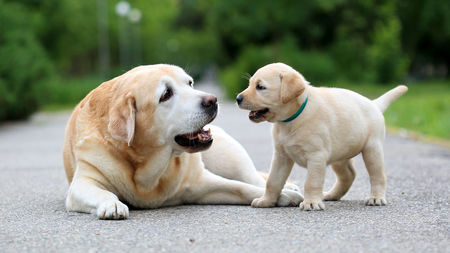

In [5]:
img = Image.open(join(path ,'data\\class3\\dogs.jpeg'))
print("Type of image data:",type(img))
img

Other details

In [6]:
print("Image model:",img.mode, "\nImage format:",img.format, "\nImage size:",img.size)

Image model: RGB 
Image format: JPEG 
Image size: (450, 253)


Display in a separate window to be closed

In [7]:
img.show()

Image object to array conversion to perform any manipulations and back to an image format

In [8]:
data = numpy.asarray(img)
data = numpy.asarray(img)
print("Type of image data:",type(data))
print("Shape of an image:", data.shape)
image2 = Image.fromarray(data)
print("Type of image data:", type(image2))

Type of image data: <class 'numpy.ndarray'>
Shape of an image: (253, 450, 3)
Type of image data: <class 'PIL.Image.Image'>


### 2. OpenCV

In [9]:
#!pip install opencv-python

In [10]:
import cv2

img = cv2.imread(join(path ,'data\\class3\\dogs.jpeg'))
print(type(img))
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<class 'numpy.ndarray'>


### 3. Scikit-Image

In [11]:
#!pip install scikit-image==0.16.2

<class 'numpy.ndarray'>


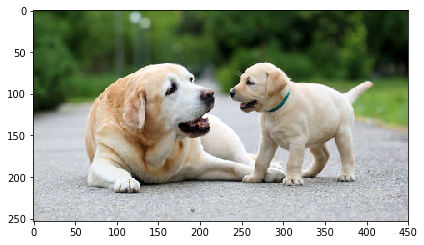

In [12]:
import skimage.io as io
img = io.imread(join(path ,'data\\class3\\dogs.jpeg'))
print(type(img))
io.imshow(img)

## Matplotlib

In [13]:
from matplotlib import image

Fetch a single image

In [14]:
img_data = image.imread(path+ 'data\class3\\' + 'dogs.jpeg')
print(type(img_data))
print(img_data.shape)

<class 'numpy.ndarray'>
(253, 450, 3)


Fetch multiple image from a particular path

In [15]:
images = []
for img in os.listdir(path+'data\\check'):  
    print(img)
    img_data = image.imread(path+'data\\check\\'+img)    
    images.append(img_data)    
images = numpy.array(images)
images[0].shape

a1.png
a2.png
a3.png
a4.png
a5.png


(211, 421, 4)

### 5. Mahotas

In [16]:
#pip install mahotas

<class 'numpy.ndarray'>


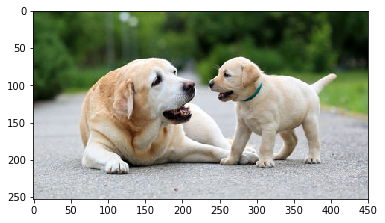

In [17]:
from pylab import imshow, show
import mahotas

img = mahotas.imread(join(path ,'data\\class3\\dogs.jpeg'))
print(type(img))
imshow(img)

## Deep Learning

In [18]:
# Since some versins of keras and tensorflow are not compatible to each other, hence let's check the versions intalled
#!pip install tensorflow==2.4.1
#!pip install keras==2.4.3

In [19]:
import tensorflow
import keras

### 6. Keras load_img function

<class 'PIL.Image.Image'>


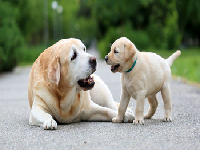

In [20]:
from keras.preprocessing.image import load_img
img = load_img(path+'data\\class3\\dogs.jpeg', 
               grayscale=False, 
               color_mode="rgb", 
               target_size= (150,200),
               interpolation="nearest")
print(type(img))
img

### 7. Keras augmented images flow

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

img_gen = ImageDataGenerator(rotation_range=40, zoom_range=0.3, horizontal_flip = True, fill_mode='reflect')

In [22]:
path_to_save = 'D:\\Users\\SKaul7\\Desktop\\generated'

#### Data loaded in memory called via flow()

In [23]:
# load image in memory
x = io.imread(join(path ,'data\\class3\\dogs.jpeg'))
# iterator should have rank 4 or else commenting below line throws an error
x = x.reshape((1,)+x.shape) 
# iterator generates batches of randomly transformed images
iterator = img_gen.flow(x, batch_size=4, save_to_dir = path_to_save ,save_prefix='pre', save_format='png')
count=1
#Saves augmented 5 images in a path_to_save directory
for batch in iterator:        
    if count>=5:
        break
    count += 1

#### Data saved in disk called via flow_from_directory()
There are 4 subfolders which implies to have images with 4 different classes.

In [24]:
folder = path+'data'
iterator = img_gen.flow_from_directory(directory = folder,
                                       target_size= (100,100),
                                       batch_size=4,
                                       save_to_dir = path_to_save)
                                       
x,y = iterator.next()
print('Batch Image Shape',x.shape)

Found 17 images belonging to 4 classes.
Batch Image Shape (4, 100, 100, 3)


# END